In [1]:
import pandas as pd
from prep import preprocess_data

df = pd.read_csv("./apache/train_labeled.csv")
df = preprocess_data(df)
df.head()

,project_id,project_key,project_name,project_category,average_lifespan,average_workspan,average_change_density,average_reassignment_rate,average_description_edit_rate,average_author_churn,...,bug_to_development_ratio,num_priority_high_ratio,num_priority_medium_ratio,num_priority_low_ratio,num_priority_other_ratio,high_priority_bug_ratio,schedule_risk,quality_risk,combined_risk,risk_category
0,12316921,CONTINUUM,Continuum,"Build, Release, & Project Management",183.388674,718.095796,344.106902,0.062784,0.004675,0.859361,...,1.310256,0.071376,0.737796,0.190828,0.000000,0.040466,0,1,S0Q1,Quality Risk Only
1,12310732,JSPWIKI,JSPWiki,Web Frameworks & UI,322.902468,1607.497204,72.102385,0.053574,0.024022,0.887127,...,1.237996,0.044776,0.426306,0.528918,0.000000,0.024769,0,0,S0Q0,Low Risk
2,12310493,TRANSACTION,Commons Transaction,Libraries & Utilities (Commons & Core),242.376100,502.277625,7.014970,0.062955,0.010582,0.690476,...,1.470587,0.095238,0.666667,0.238095,0.000000,0.056689,1,1,S1Q1,High Risk
3,12323721,MWRAPPER,Maven Wrapper,"Build, Release, & Project Management",155.086469,248.868168,80.239918,0.049586,0.037538,0.490446,...,1.038961,0.040541,0.824324,0.189189,0.006757,0.021914,0,0,S0Q0,Low Risk
4,12310740,HTTPDRAFT,Labs WebArch draft-fielding-http (Retired),Incubator & Retired/Dormant Projects,13.550386,38.347902,8.975719,0.112834,0.000000,0.961538,...,1.600000,0.000000,0.063158,0.021053,1.831579,0.000000,1,0,S1Q0,Schedule Risk Only


In [2]:
# drop unused columns (derived from the results of this analysis)
unused_columns = [
    # 'resolution_ratio', # high VIF score
    'num_status_done_pct', # high VIF score
    'num_status_to_do_pct', # high VIF score
    'num_resolution_other_pct', # high VIF score
    'num_issue_type_task_ratio', # high VIF score
    'num_issue_type_improvement_ratio', # high VIF score
    'num_issue_type_feature_ratio', # high VIF score
    'high_priority_bug_ratio', # used for labeling
    'incomplete_ratio', # used for labeling
]

df = df.drop(columns=unused_columns)

## 10. Feature Importance Hypotheses

In this section, we'll explore which features are most strongly associated with our risk labels, using univariate statistical tests and feature ranking approaches. This will help us understand which metrics are most predictive of project risks.

Top Features Associated with Schedule Risk:


,feature,p_value,mean_group0,mean_group1,difference
20,num_resolution_fixed_pct,5.854001e-42,71.302361,41.530466,-29.771895
22,num_resolution_won't_fix_pct,5.945835e-24,6.101103,1.818493,-4.282611
14,total_reporters,9.493615e-21,374.354651,113.540541,-260.814111
15,total_members,1.054726e-20,385.845930,117.027027,-268.818903
13,total_assignees,4.207158e-19,76.148256,22.047297,-54.100959
16,total_issues,1.753713e-18,2042.270349,455.783784,-1586.486565
12,total_changes,1.114063e-17,17406.218023,3541.310811,-13864.907212
6,average_fix_version_change_rate,2.701016e-15,0.080625,0.045115,-0.035510
2,average_change_density,4.806791e-15,288.143958,95.789331,-192.354628
9,average_status_change_rate,4.050278e-14,0.189613,0.118929,-0.070685


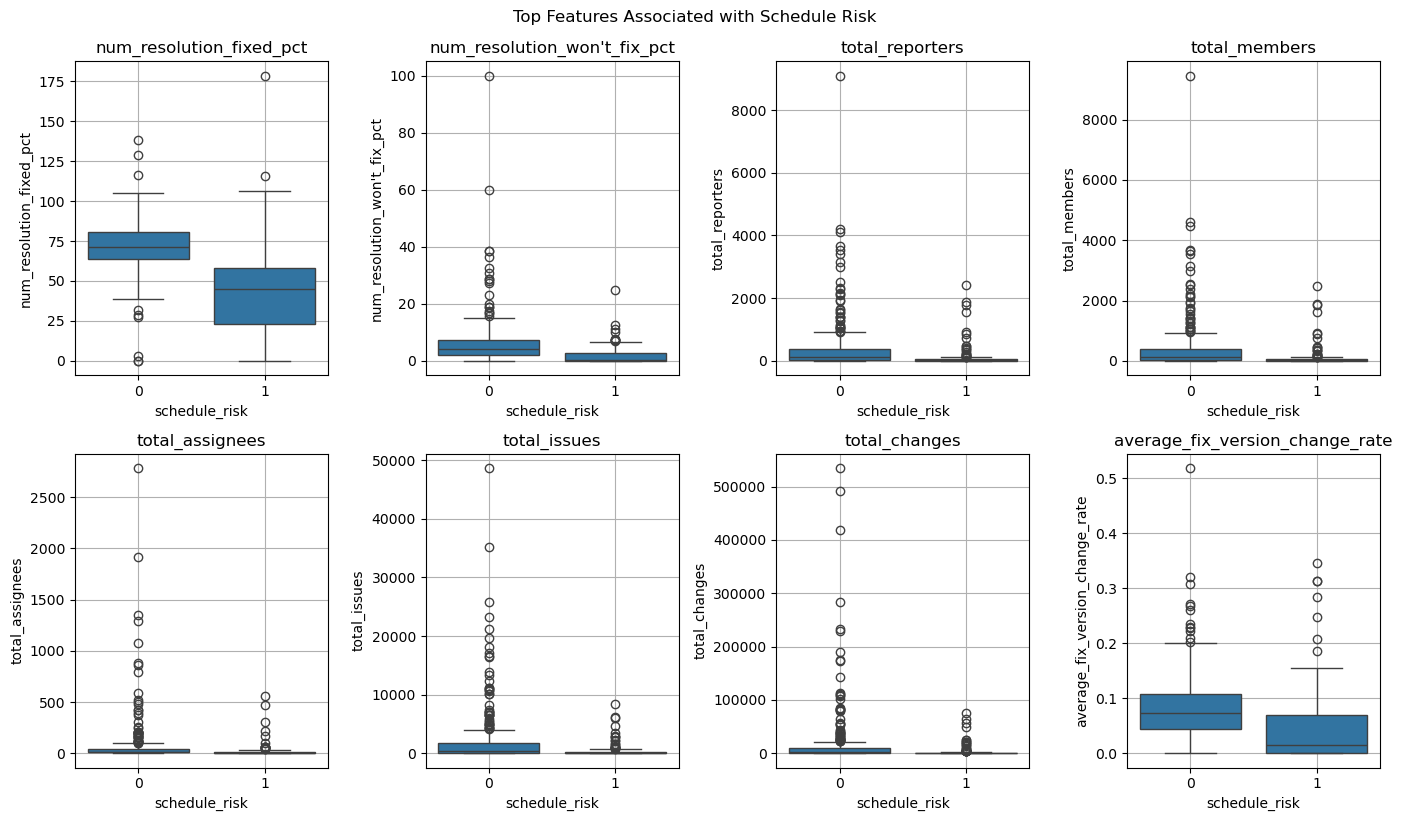


Top Features Associated with Quality Risk:


,feature,p_value,mean_group0,mean_group1,difference
29,num_priority_high_ratio,5.365831e-54,0.035460,0.111814,0.076354
28,bug_to_development_ratio,3.820906e-14,873.496886,1353.079294,479.582408
26,num_issue_type_bug_ratio,1.088394e-13,0.424260,0.570939,0.146679
15,total_members,2.155970e-07,234.953488,467.750000,232.796512
14,total_reporters,2.467274e-07,228.651163,452.202703,223.551540
21,num_resolution_duplicate_pct,3.019807e-07,2.307185,3.573414,1.266229
1,average_workspan,7.819218e-05,438.617767,551.094169,112.476402
10,average_priority_change_rate,8.312878e-05,0.004384,0.006115,0.001731
30,num_priority_medium_ratio,9.269089e-05,0.743279,0.670258,-0.073022
23,num_resolution_incomplete_pct,1.432144e-04,0.658080,1.235979,0.577899


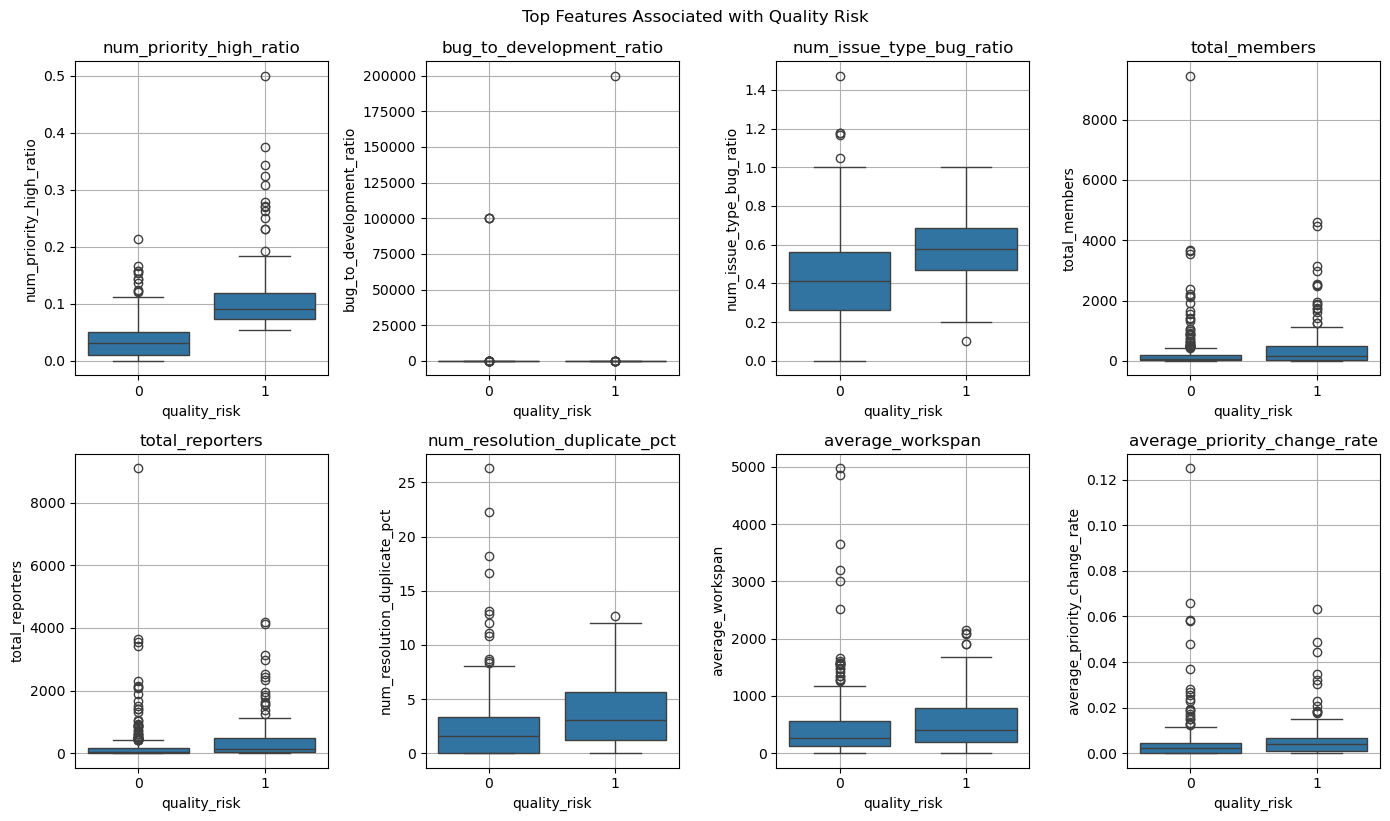

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Import additional libraries for statistical tests
from scipy.stats import ttest_ind, mannwhitneyu
import scipy.stats as stats

# Select numerical features for analysis, excluding the risk scores and labels themselves
feature_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_cols = [col for col in feature_cols if not ('risk_score' in col or 'risk' in col or 'z_' in col 
                                                 or 'flag_' in col or '_log' in col or 'log1p_' in col or 'id' in col)]

# Function to perform statistical tests between features and binary target
def feature_association_tests(df, features, target, test_type='ttest'):
    results = []
    
    for feature in features:
        if df[feature].isnull().sum() > 0:
            # Skip features with missing values or handle them appropriately
            continue
            
        group1 = df[df[target] == 0][feature]
        group2 = df[df[target] == 1][feature]
        
        if len(group1) == 0 or len(group2) == 0:
            # Skip if either group is empty
            continue
            
        try:
            if test_type == 'ttest':
                # Parametric t-test
                stat, pval = ttest_ind(group1, group2, equal_var=False)
            elif test_type == 'mannwhitney':
                # Non-parametric Mann-Whitney U test
                stat, pval = mannwhitneyu(group1, group2)
            
            mean1 = group1.mean()
            mean2 = group2.mean()
            
            results.append({
                'feature': feature,
                'test': test_type,
                'statistic': stat,
                'p_value': pval,
                'mean_group0': mean1,
                'mean_group1': mean2,
                'difference': mean2 - mean1,
                'significant': pval < 0.05
            })
        except Exception as e:
            print(f"Error on feature {feature}: {e}")
    
    return pd.DataFrame(results).sort_values('p_value')

# Perform tests for schedule risk
if 'schedule_risk' in df.columns:
    schedule_results = feature_association_tests(df, feature_cols, 'schedule_risk', 'mannwhitney')
    
    # Display top features associated with schedule risk
    print("Top Features Associated with Schedule Risk:")
    schedule_top = schedule_results[schedule_results['significant']].head(15)
    display(schedule_top[['feature', 'p_value', 'mean_group0', 'mean_group1', 'difference']])
    
    # Visualize top discriminative features
    plt.figure(figsize=(14, 8))
    top_features = schedule_top['feature'].head(8).tolist()
    
    for i, feature in enumerate(top_features):
        plt.subplot(2, 4, i+1)
        sns.boxplot(x='schedule_risk', y=feature, data=df)
        plt.title(feature)
        plt.grid(True)
        
    plt.tight_layout()
    plt.suptitle('Top Features Associated with Schedule Risk', y=1.02)
    plt.show()

# Perform tests for quality risk
if 'quality_risk' in df.columns:
    quality_results = feature_association_tests(df, feature_cols, 'quality_risk', 'mannwhitney')
    
    # Display top features associated with quality risk
    print("\nTop Features Associated with Quality Risk:")
    quality_top = quality_results[quality_results['significant']].head(15)
    display(quality_top[['feature', 'p_value', 'mean_group0', 'mean_group1', 'difference']])
    
    # Visualize top discriminative features
    plt.figure(figsize=(14, 8))
    top_features = quality_top['feature'].head(8).tolist()
    
    for i, feature in enumerate(top_features):
        plt.subplot(2, 4, i+1)
        sns.boxplot(x='quality_risk', y=feature, data=df)
        plt.title(feature)
        plt.grid(True)
        
    plt.tight_layout()
    plt.suptitle('Top Features Associated with Quality Risk', y=1.02)
    plt.show()

In [4]:
feature_cols

['average_lifespan',
 'average_workspan',
 'average_change_density',
 'average_reassignment_rate',
 'average_description_edit_rate',
 'average_author_churn',
 'average_fix_version_change_rate',
 'average_time_estimate_change_rate',
 'average_resolution_change_rate',
 'average_status_change_rate',
 'average_priority_change_rate',
 'average_issue_type_change_rate',
 'total_changes',
 'total_assignees',
 'total_reporters',
 'total_members',
 'total_issues',
 'assignee_reporter_ratio',
 'num_status_in_progress_pct',
 'num_status_other_pct',
 'num_resolution_fixed_pct',
 'num_resolution_duplicate_pct',
 "num_resolution_won't_fix_pct",
 'num_resolution_incomplete_pct',
 'resolution_ratio',
 'reopen_ratio',
 'num_issue_type_bug_ratio',
 'num_issue_type_other_ratio',
 'bug_to_development_ratio',
 'num_priority_high_ratio',
 'num_priority_medium_ratio',
 'num_priority_low_ratio',
 'num_priority_other_ratio']

Top Features for Schedule Risk (Mutual Information):


,feature,score
20,num_resolution_fixed_pct,0.215331
13,total_assignees,0.124378
12,total_changes,0.120672
22,num_resolution_won't_fix_pct,0.113828
6,average_fix_version_change_rate,0.105986
16,total_issues,0.093642
14,total_reporters,0.090362
11,average_issue_type_change_rate,0.089691
1,average_workspan,0.080749
2,average_change_density,0.078652


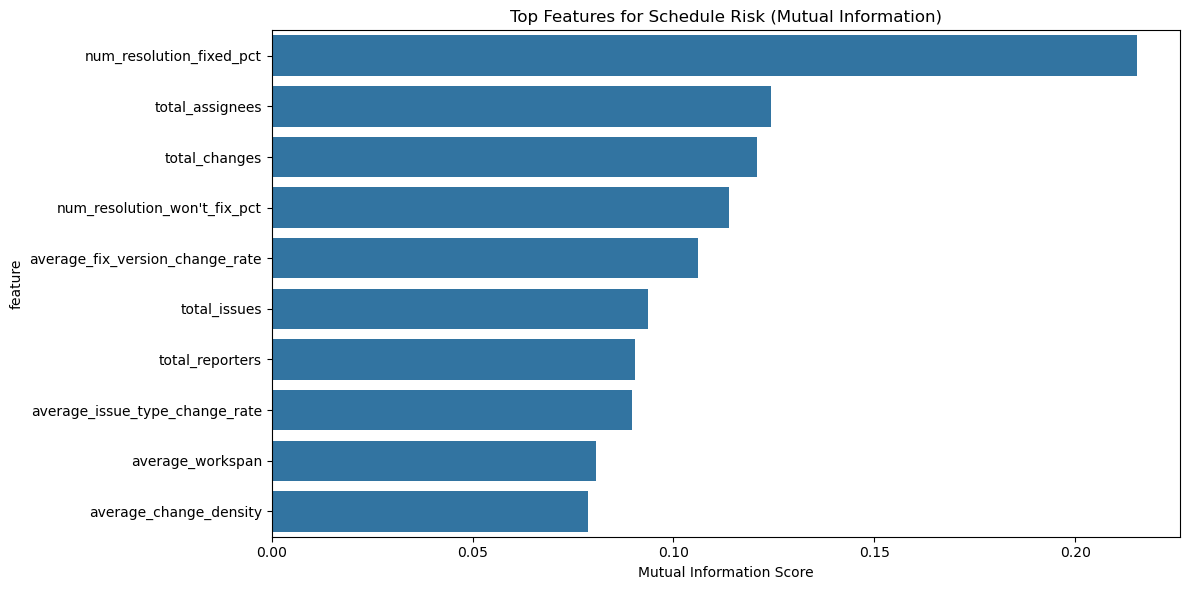


Top Features for Schedule Risk (F-value):


c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,feature,score
20,num_resolution_fixed_pct,253.300252
9,average_status_change_rate,64.829060
8,average_resolution_change_rate,48.092981
22,num_resolution_won't_fix_pct,36.723281
6,average_fix_version_change_rate,34.395657
4,average_description_edit_rate,22.013447
1,average_workspan,21.747178
24,resolution_ratio,21.586308
21,num_resolution_duplicate_pct,20.623881
18,num_status_in_progress_pct,16.889147



Top Features for Quality Risk (Mutual Information):


,feature,score
29,num_priority_high_ratio,0.358003
26,num_issue_type_bug_ratio,0.093612
28,bug_to_development_ratio,0.065139
30,num_priority_medium_ratio,0.055628
22,num_resolution_won't_fix_pct,0.046794
13,total_assignees,0.040365
21,num_resolution_duplicate_pct,0.035949
20,num_resolution_fixed_pct,0.033855
1,average_workspan,0.032564
9,average_status_change_rate,0.031901


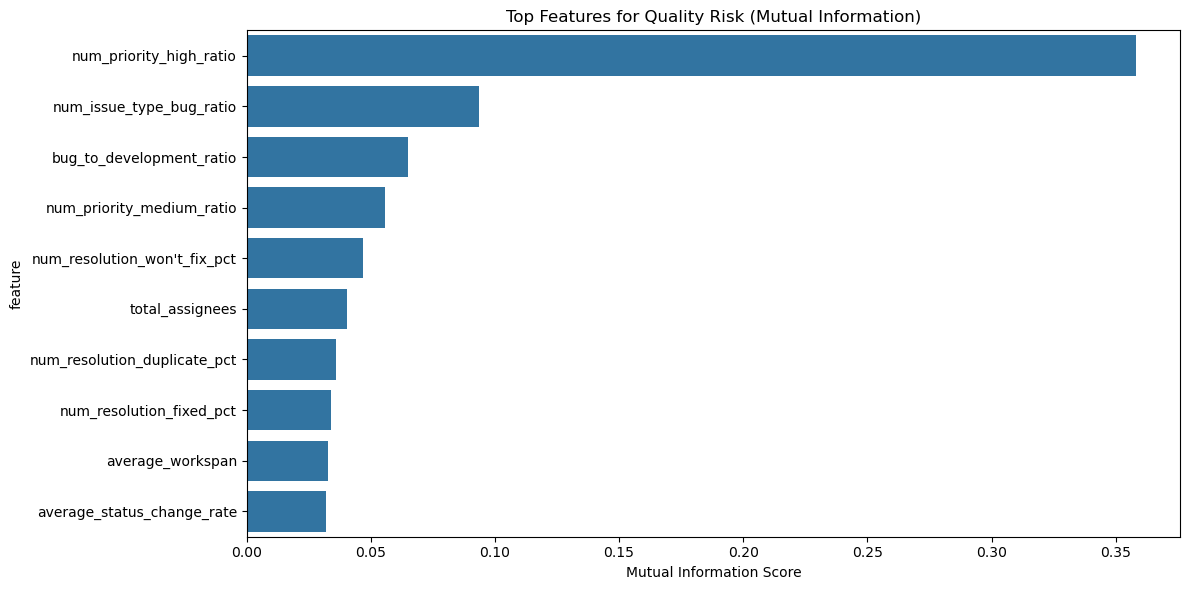


Top Features for Quality Risk (F-value):


c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,feature,score
29,num_priority_high_ratio,287.423267
26,num_issue_type_bug_ratio,45.288020
21,num_resolution_duplicate_pct,17.714287
30,num_priority_medium_ratio,11.303822
17,assignee_reporter_ratio,11.030633
15,total_members,10.940395
14,total_reporters,10.834933
6,average_fix_version_change_rate,9.618533
5,average_author_churn,8.165373
13,total_assignees,5.870818


In [5]:
# Import additional libraries for feature selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Define features and handle missing values
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_for_ranking = feature_cols  # Use the previously defined feature columns

# Create features and target arrays
X = df[features_for_ranking].fillna(0)  # Simple imputation for ranking purposes

# Function to rank features for a given target
def rank_features(X, y, method='mutual_info', top_n=15):
    if method == 'mutual_info':
        # Mutual information (works well with non-linear relationships)
        selector = SelectKBest(mutual_info_classif, k='all')
        selector.fit(X, y)
        scores = selector.scores_
    elif method == 'f_value':
        # ANOVA F-value (good for linear relationships)
        selector = SelectKBest(f_classif, k='all')
        selector.fit(X, y)
        scores = selector.scores_
    elif method == 'correlation':
        # Point-biserial correlation (specialized Pearson for binary target)
        scores = []
        for col in range(X.shape[1]):
            corr, _ = stats.pointbiserialr(y, X.iloc[:, col])
            scores.append(abs(corr))  # Take absolute value for ranking
    
    # Create DataFrame with scores
    feature_scores = pd.DataFrame({
        'feature': X.columns,
        'score': scores
    })
    
    return feature_scores.sort_values('score', ascending=False).head(top_n)

# Rank features for schedule risk
if 'schedule_risk' in df.columns:
    y_schedule = df['schedule_risk']
    
    # Mutual information ranking
    mi_schedule = rank_features(X, y_schedule, method='mutual_info')
    print("Top Features for Schedule Risk (Mutual Information):")
    display(mi_schedule)
    
    # Visualize top features (mutual info)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='score', y='feature', data=mi_schedule.head(10))
    plt.title('Top Features for Schedule Risk (Mutual Information)')
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    plt.show()
    
    # F-value ranking
    f_schedule = rank_features(X, y_schedule, method='f_value')
    print("\nTop Features for Schedule Risk (F-value):")
    display(f_schedule)

# Rank features for quality risk
if 'quality_risk' in df.columns:
    y_quality = df['quality_risk']
    
    # Mutual information ranking
    mi_quality = rank_features(X, y_quality, method='mutual_info')
    print("\nTop Features for Quality Risk (Mutual Information):")
    display(mi_quality)
    
    # Visualize top features (mutual info)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='score', y='feature', data=mi_quality.head(10))
    plt.title('Top Features for Quality Risk (Mutual Information)')
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    plt.show()
    
    # F-value ranking
    f_quality = rank_features(X, y_quality, method='f_value')
    print("\nTop Features for Quality Risk (F-value):")
    display(f_quality)

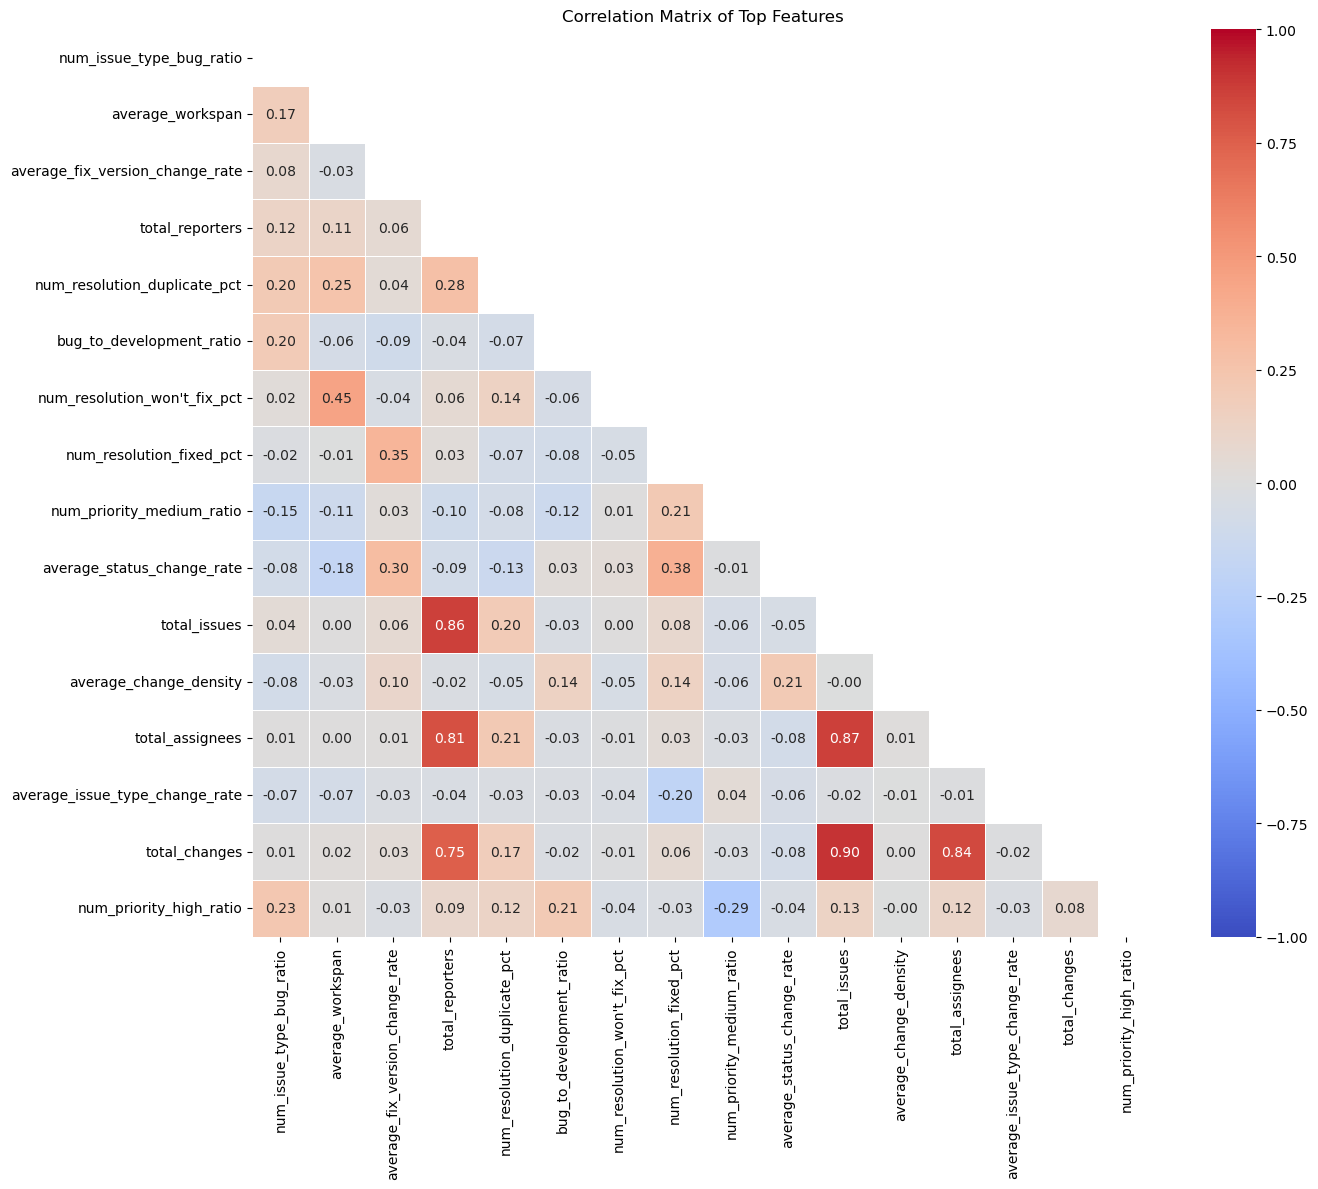

Highly Correlated Feature Pairs (|r| >= 0.7):


,feature1,feature2,correlation
4,total_issues,total_changes,0.899668
3,total_issues,total_assignees,0.865963
0,total_reporters,total_issues,0.864123
5,total_assignees,total_changes,0.835385
1,total_reporters,total_assignees,0.807930
2,total_reporters,total_changes,0.754912



These features might be redundant and candidates for removal or dimensionality reduction.


In [6]:
# Feature Redundancy Analysis
import numpy as np

# Select the top features from previous analyses to focus on
top_features_schedule = list(mi_schedule['feature'].head(10))
top_features_quality = list(mi_quality['feature'].head(10))

# Combine unique top features
top_features = list(set(top_features_schedule + top_features_quality))

# Calculate correlation matrix for top features
top_features_corr = df[top_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(top_features_corr, dtype=bool))
sns.heatmap(top_features_corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top Features')
plt.tight_layout()
plt.show()

# Identify highly correlated pairs (potential redundancies)
high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        corr = top_features_corr.iloc[i, j]
        if abs(corr) >= high_corr_threshold:
            high_corr_pairs.append({
                'feature1': top_features_corr.index[i],
                'feature2': top_features_corr.columns[j],
                'correlation': corr
            })

# Display highly correlated features
if high_corr_pairs:
    print("Highly Correlated Feature Pairs (|r| >= {}):".format(high_corr_threshold))
    display(pd.DataFrame(high_corr_pairs).sort_values('correlation', 
                                                    key=abs, 
                                                    ascending=False))
    print("\nThese features might be redundant and candidates for removal or dimensionality reduction.")
else:
    print("No highly correlated feature pairs found with threshold {}.".format(high_corr_threshold))

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
X_vif = X[top_features].copy()
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values('VIF', ascending=False))

                            feature        VIF
10                     total_issues  11.581195
7          num_resolution_fixed_pct  11.340539
8         num_priority_medium_ratio   7.925043
14                    total_changes   6.418603
3                   total_reporters   5.745467
0          num_issue_type_bug_ratio   5.421100
9        average_status_change_rate   5.268723
12                  total_assignees   5.220486
2   average_fix_version_change_rate   2.716673
1                  average_workspan   2.543012
15          num_priority_high_ratio   2.275149
4      num_resolution_duplicate_pct   2.101510
6      num_resolution_won't_fix_pct   1.883542
11           average_change_density   1.322494
5          bug_to_development_ratio   1.165355
13   average_issue_type_change_rate   1.144795


## 11. Project Similarity and Grouping

In this section, we'll explore natural groupings in the data to identify clusters of projects that exhibit similar behaviors. This can help us understand if there are distinct project profiles that tend toward particular risk patterns.

In [8]:
# Feature Selection and Preprocessing for Clustering
from sklearn.preprocessing import StandardScaler

# Select important features without including target variables
clustering_features = mi_schedule['feature'].tolist() + mi_quality['feature'].tolist()

# Make the list unique while preserving order
clustering_features = list(dict.fromkeys(clustering_features))

# Filter to only include columns that exist in our dataframe
clustering_features = [col for col in clustering_features if col in df.columns]

# Filter complete cases for clustering
df_cluster = df[clustering_features].dropna()

# Store the risk labels corresponding to the filtered data
if 'schedule_risk' in df.columns and 'quality_risk' in df.columns:
    cluster_indices = df_cluster.index
    cluster_risk_data = df.loc[cluster_indices, ['schedule_risk', 'quality_risk', 'risk_category']]

# Scale the features for clustering
scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(
    scaler.fit_transform(df_cluster),
    columns=df_cluster.columns,
    index=df_cluster.index
)

print(f"Clustering data shape: {df_cluster.shape}")
print("Selected features for clustering:")
print(', '.join(clustering_features))

Clustering data shape: (492, 23)
Selected features for clustering:
num_resolution_fixed_pct, total_assignees, total_changes, num_resolution_won't_fix_pct, average_fix_version_change_rate, total_issues, total_reporters, average_issue_type_change_rate, average_workspan, average_change_density, average_status_change_rate, average_lifespan, total_members, average_description_edit_rate, resolution_ratio, num_priority_high_ratio, num_issue_type_bug_ratio, bug_to_development_ratio, num_priority_medium_ratio, num_resolution_duplicate_pct, average_priority_change_rate, num_priority_low_ratio, average_time_estimate_change_rate


Explained variance ratio by PCA components:
[0.19857657 0.10912165 0.0889524  0.08089886 0.06440613 0.05422451
 0.04919853 0.04464922 0.04146446 0.03856003 0.03591726 0.03269015
 0.03084552 0.02721174 0.02465142 0.02331641 0.01535892]
Number of components selected: 17
Total explained variance: 96.00%


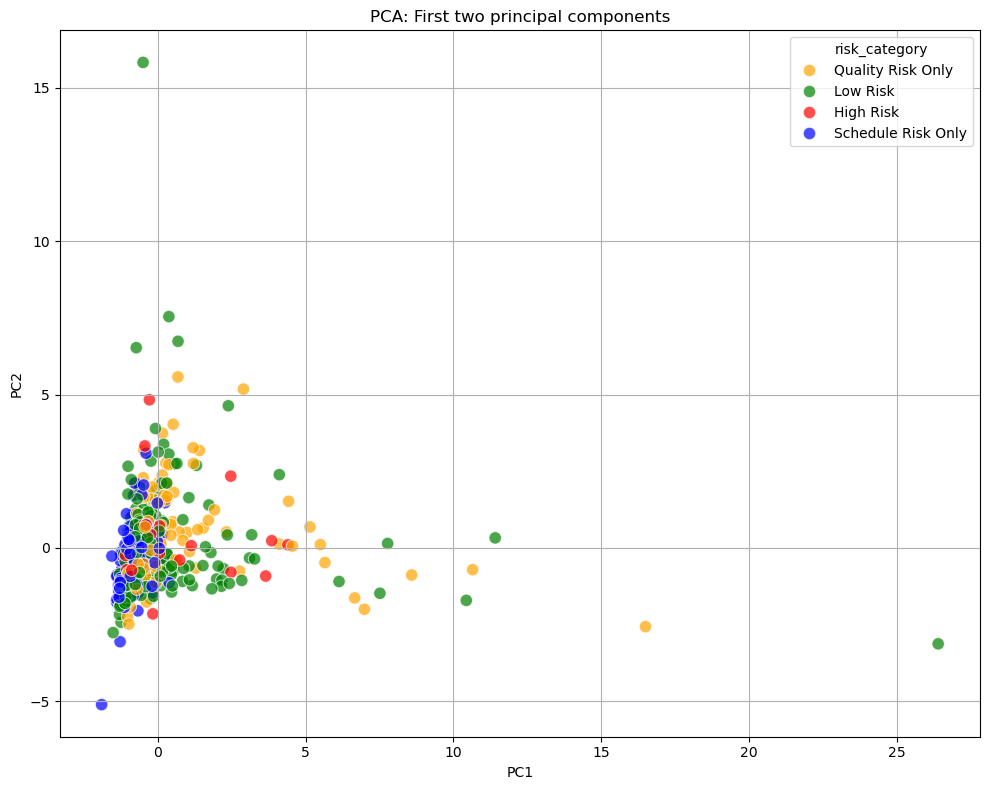

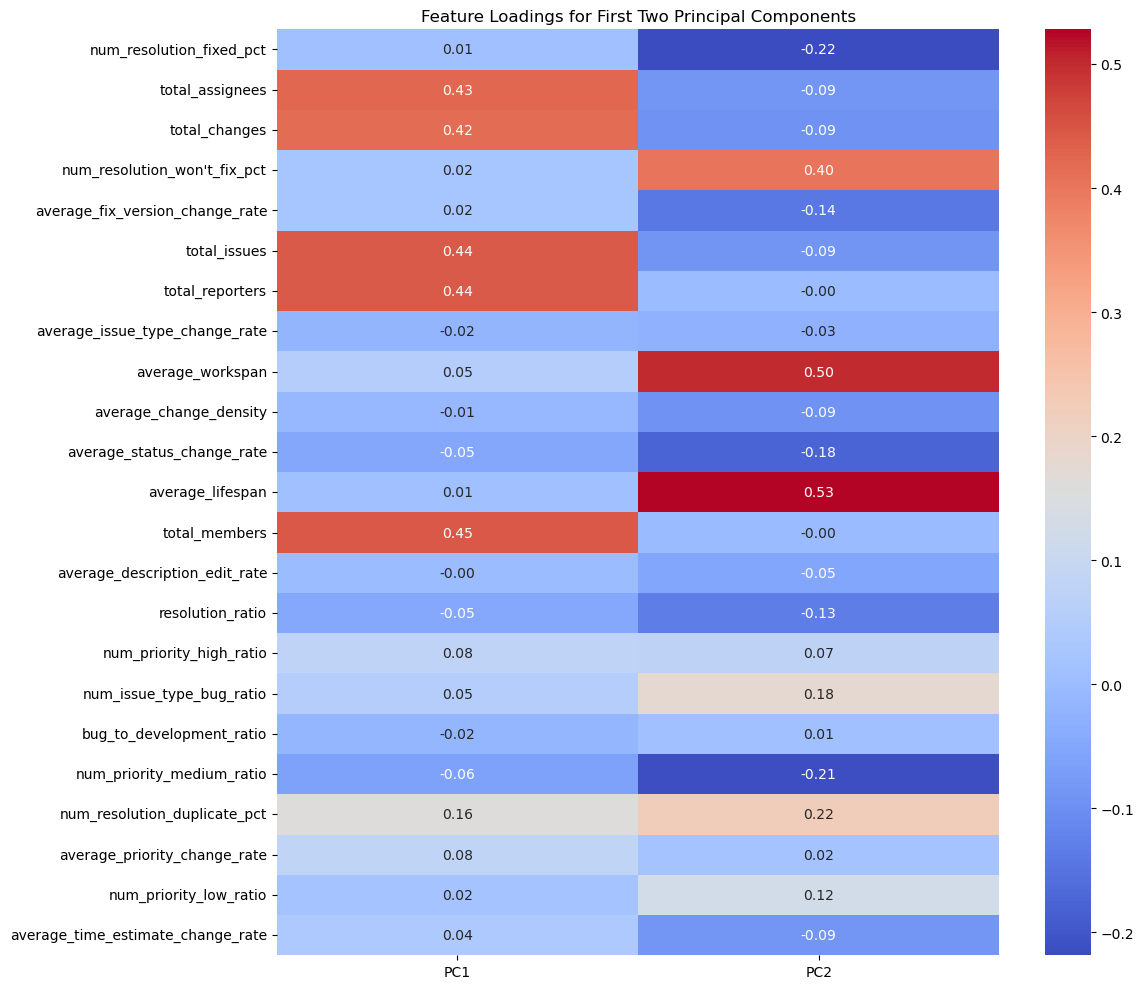

In [9]:
# Dimensionality Reduction with PCA

# Import additional libraries for dimensionality reduction
from sklearn.decomposition import PCA

# Apply PCA for visualization and to reduce collinearity
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_result = pca.fit_transform(df_cluster_scaled)

# Print explained variance 
print("Explained variance ratio by PCA components:")
print(pca.explained_variance_ratio_)
print(f"Number of components selected: {pca_result.shape[1]}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")

# Create DataFrame with principal components
pca_df = pd.DataFrame(
    pca_result,
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])],
    index=df_cluster.index
)

# Plot the first two principal components
plt.figure(figsize=(10, 8))

if 'risk_category' in df.columns:
    # Color points by risk category
    scatter = sns.scatterplot(
        x='PC1', 
        y='PC2', 
        data=pca_df,
        hue=df['risk_category'].loc[pca_df.index],
        palette={'Low Risk': 'green', 'Quality Risk Only': 'orange', 
                'Schedule Risk Only': 'blue', 'High Risk': 'red'},
        alpha=0.7,
        s=80
    )
else:
    # No risk categories, just plot the points
    scatter = sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)

plt.title('PCA: First two principal components')
# log scale
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature loadings for the first two principal components
feature_loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=clustering_features
)

# Plot the PCA loadings
plt.figure(figsize=(12, 10))
sns.heatmap(feature_loadings, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Loadings for First Two Principal Components')
plt.tight_layout()
plt.show()

c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


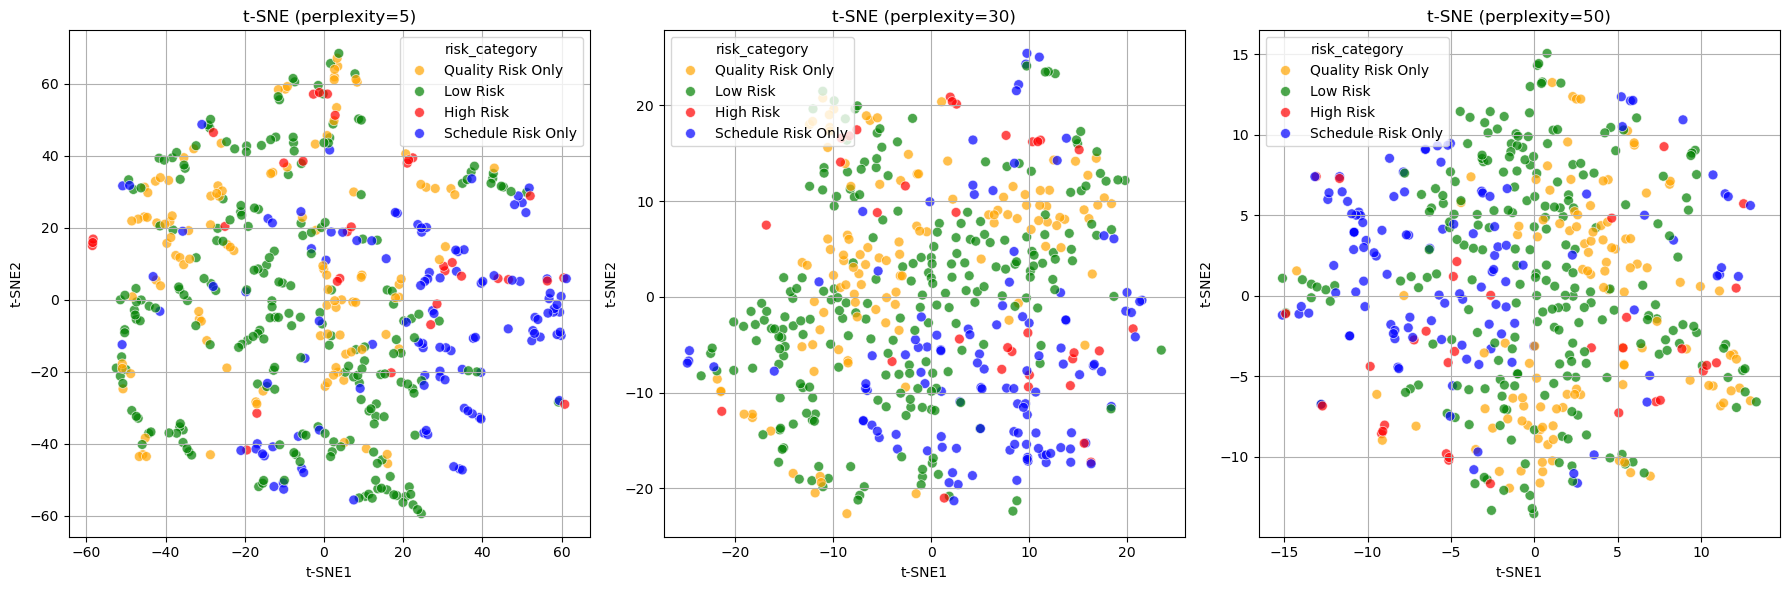

c:\Users\phuon\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [10]:
# Dimensionality Reduction with t-SNE for Non-linear Relationships

# Import additional libraries for t-SNE
from sklearn.manifold import TSNE

# Try multiple t-SNE configurations for better visualization
perplexities = [5, 30, 50]
fig, axs = plt.subplots(1, len(perplexities), figsize=(18, 6))

for i, perp in enumerate(perplexities):
    # Apply t-SNE with different perplexity values
    tsne = TSNE(n_components=2, perplexity=perp, learning_rate=200, random_state=42, n_iter=1000)
    tsne_result = tsne.fit_transform(df_cluster_scaled)
    
    # Create DataFrame with t-SNE components
    tsne_df = pd.DataFrame(
        tsne_result,
        columns=['t-SNE1', 't-SNE2'],
        index=df_cluster.index
    )
    
    # Plot t-SNE results
    if 'risk_category' in df.columns:
        # Color points by risk category
        scatter = sns.scatterplot(
            x='t-SNE1', 
            y='t-SNE2', 
            data=tsne_df,
            hue=df['risk_category'].loc[tsne_df.index],
            palette={'Low Risk': 'green', 'Quality Risk Only': 'orange', 
                    'Schedule Risk Only': 'blue', 'High Risk': 'red'},
            alpha=0.7,
            s=50,
            ax=axs[i]
        )
    else:
        # No risk categories, just plot the points
        scatter = sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_df, alpha=0.7, ax=axs[i])
    
    axs[i].set_title(f't-SNE (perplexity={perp})')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Apply standard t-SNE for subsequent analysis
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(df_cluster_scaled)

# Create DataFrame with t-SNE components
tsne_df = pd.DataFrame(
    tsne_result,
    columns=['t-SNE1', 't-SNE2'],
    index=df_cluster.index
)

c:\Users\phuon\miniconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


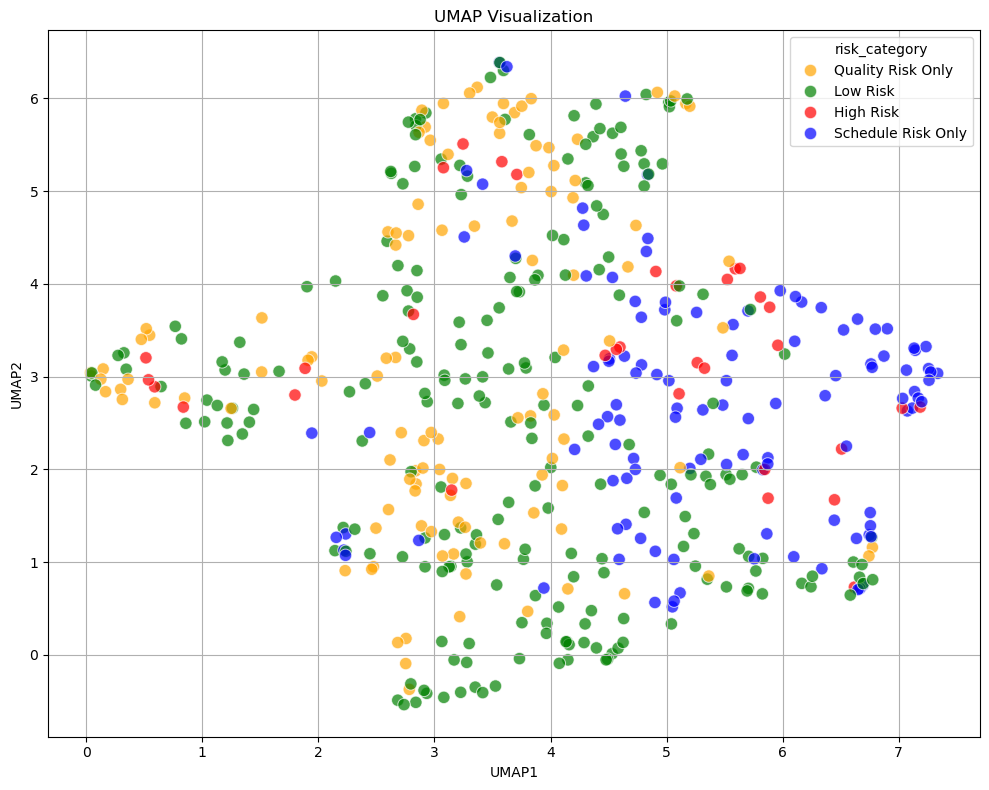

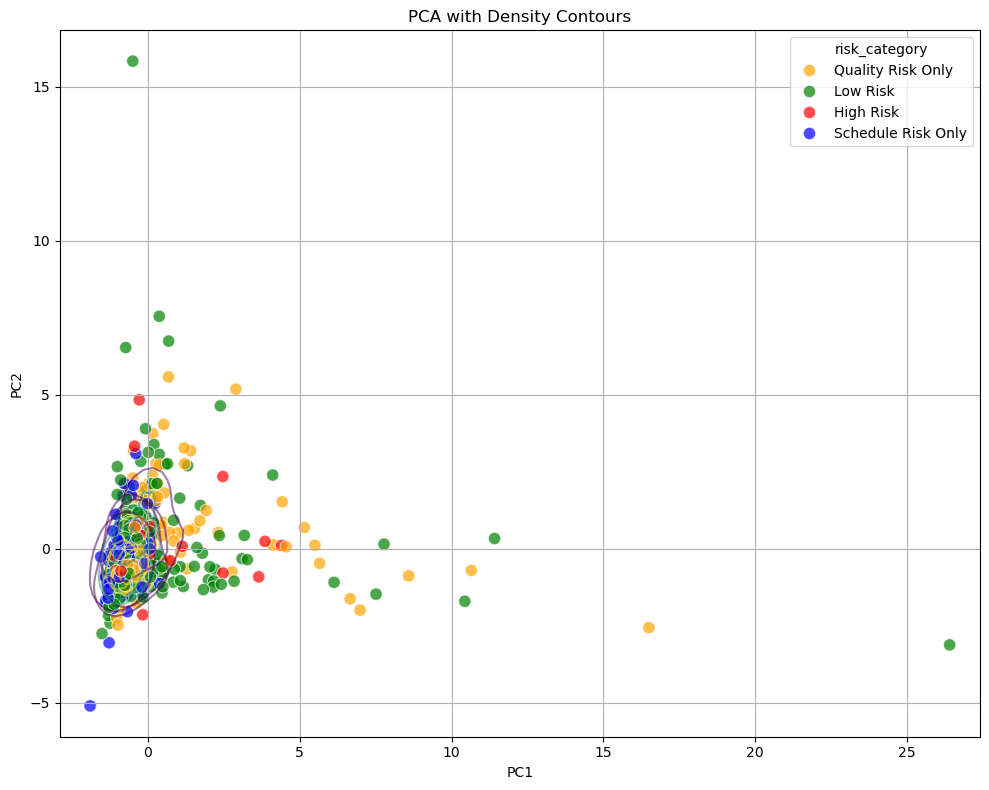

In [11]:
# Try UMAP as an alternative dimensionality reduction technique
try:
    # Import UMAP if available - might need to be installed
    from umap import UMAP
    
    # Apply UMAP for visualization
    umap_model = UMAP(n_components=2, random_state=42, n_neighbors=15)
    umap_result = umap_model.fit_transform(df_cluster_scaled)
    
    # Create DataFrame with UMAP components
    umap_df = pd.DataFrame(
        umap_result,
        columns=['UMAP1', 'UMAP2'],
        index=df_cluster.index
    )
    
    # Plot UMAP results
    plt.figure(figsize=(10, 8))
    if 'risk_category' in df.columns:
        scatter = sns.scatterplot(
            x='UMAP1', 
            y='UMAP2', 
            data=umap_df,
            hue=df['risk_category'].loc[umap_df.index],
            palette={'Low Risk': 'green', 'Quality Risk Only': 'orange', 
                    'Schedule Risk Only': 'blue', 'High Risk': 'red'},
            alpha=0.7,
            s=80
        )
    else:
        scatter = sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, alpha=0.7)
    
    plt.title('UMAP Visualization')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Add contour plot to better show boundaries for PCA
    plt.figure(figsize=(10, 8))
    if 'risk_category' in df.columns:
        # First create the scatter plot
        scatter = sns.scatterplot(
            x='PC1', 
            y='PC2', 
            data=pca_df,
            hue=df['risk_category'].loc[pca_df.index],
            palette={'Low Risk': 'green', 'Quality Risk Only': 'orange', 
                    'Schedule Risk Only': 'blue', 'High Risk': 'red'},
            alpha=0.7,
            s=80
        )
        
        # Then add decision boundary visualization using a contour plot
        from sklearn.neighbors import KernelDensity
        
        # Create a separate plot for each risk category
        risk_categories = df['risk_category'].unique()
        
        # Create a meshgrid for density estimation
        x_min, x_max = pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1
        y_min, y_max = pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                             np.linspace(y_min, y_max, 100))
        
        # Plot density contours for each category
        for category in risk_categories:
            category_data = pca_df[df['risk_category'].loc[pca_df.index] == category]
            if len(category_data) >= 5:  # Need enough points for density estimation
                kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
                kde.fit(category_data[['PC1', 'PC2']].values)
                
                # Evaluate KDE on the mesh grid
                Z = np.exp(kde.score_samples(np.c_[xx.ravel(), yy.ravel()]))
                Z = Z.reshape(xx.shape)
                
                # Plot contour
                plt.contour(xx, yy, Z, 
                        levels=np.linspace(Z.min(), Z.max(), 5)[1:-1],
                        alpha=0.5)
    
    plt.title('PCA with Density Contours')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("UMAP is not installed. To install, run: pip install umap-learn")
    print("Continuing with existing visualizations.")

For n_clusters = 2, silhouette score is 0.524
For n_clusters = 3, silhouette score is 0.138
For n_clusters = 4, silhouette score is 0.122
For n_clusters = 5, silhouette score is 0.106
For n_clusters = 6, silhouette score is 0.072
For n_clusters = 7, silhouette score is 0.129
For n_clusters = 8, silhouette score is 0.095
For n_clusters = 9, silhouette score is 0.079


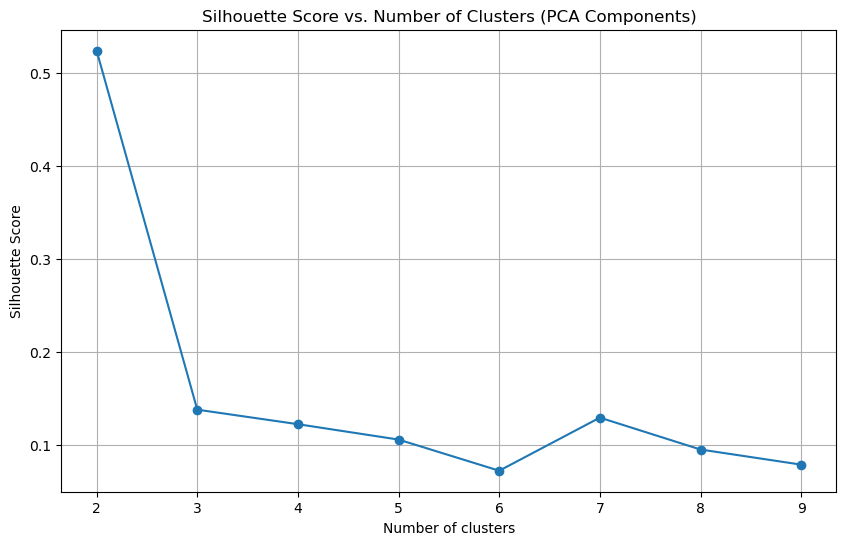

Optimal number of clusters based on silhouette score: 2


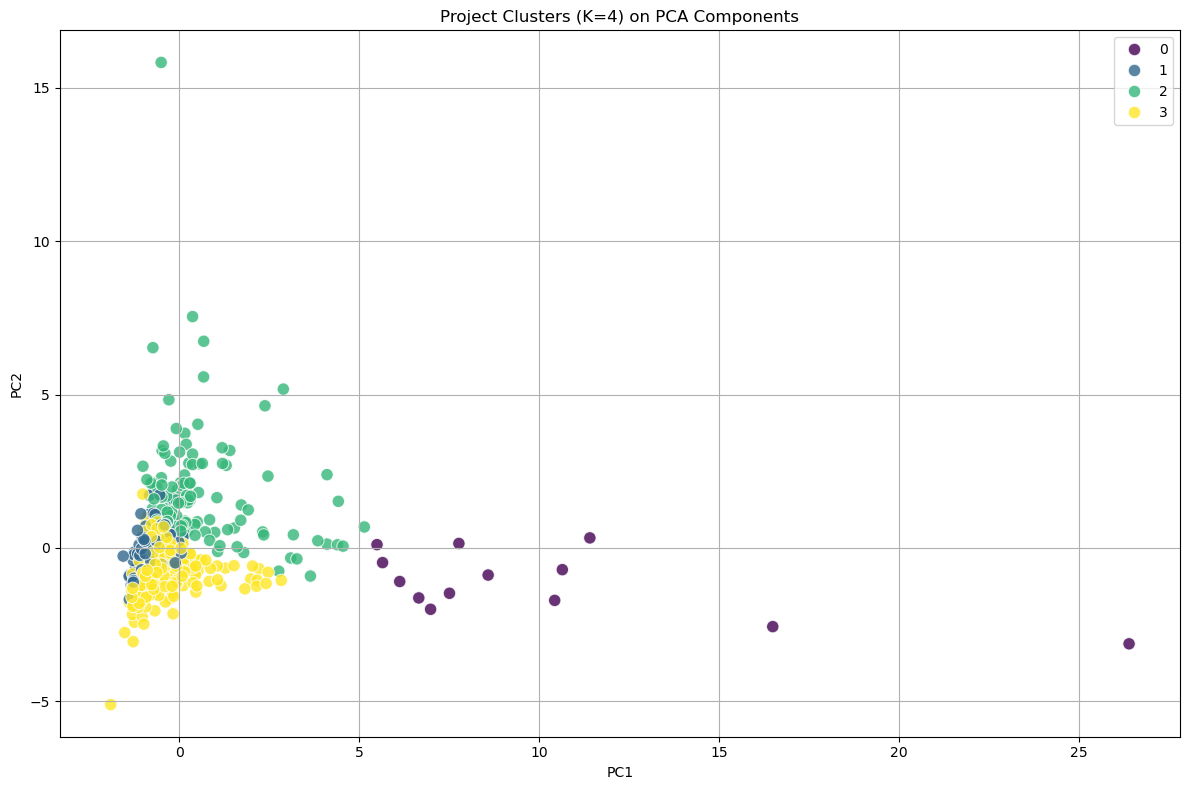

In [12]:
# K-Means Clustering to Identify Project Groups
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choose embedding: 'pca', 'tsne', or 'umap'
embedding_method = 'pca'

if embedding_method == 'pca':
    embedding = pca_result
    embedding_df = pca_df
    x_col, y_col = 'PC1', 'PC2'
    plot_title = 'PCA Components'
elif embedding_method == 'tsne':
    embedding = tsne_result
    embedding_df = tsne_df
    x_col, y_col = 't-SNE1', 't-SNE2'
    plot_title = 't-SNE Components'
elif embedding_method == 'umap':
    embedding = umap_result
    embedding_df = umap_df
    x_col, y_col = 'UMAP1', 'UMAP2'
    plot_title = 'UMAP Components'
else:
    raise ValueError("embedding_method must be 'pca', 'tsne', or 'umap'")

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embedding)
    silhouette_avg = silhouette_score(embedding, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Score vs. Number of Clusters ({plot_title})')
plt.grid(True)
plt.show()

# Select optimal k (can be adjusted based on silhouette score and domain knowledge)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

optimal_k = 4  # Adjust this based on your analysis and domain knowledge

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embedding)

# Add cluster labels to our dataframe
df.loc[embedding_df.index, 'cluster'] = cluster_labels

# Visualize the clusters on the embedding plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x_col, 
    y=y_col, 
    data=embedding_df,
    hue=cluster_labels,
    palette='viridis',
    alpha=0.8,
    s=80
)
plt.title(f'Project Clusters (K={optimal_k}) on {plot_title}')
plt.grid(True)
plt.tight_layout()
plt.show()


Cluster Profiles (Mean Values):


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
num_resolution_fixed_pct,66.746912,32.126235,57.759195,75.253191
total_assignees,938.384615,6.875000,62.175000,34.745247
total_changes,239516.384615,737.010417,11118.316667,7578.665399
num_resolution_won't_fix_pct,4.506255,1.755626,9.708857,3.710008
average_fix_version_change_rate,0.069901,0.018164,0.064965,0.091116
total_issues,21409.384615,148.437500,1719.975000,1030.524715
total_reporters,3232.615385,29.572917,533.133333,139.707224
average_issue_type_change_rate,0.005346,0.013003,0.003327,0.004599
average_workspan,490.667092,241.037144,1002.641701,314.111052
average_change_density,206.178735,137.395811,162.262684,296.412544


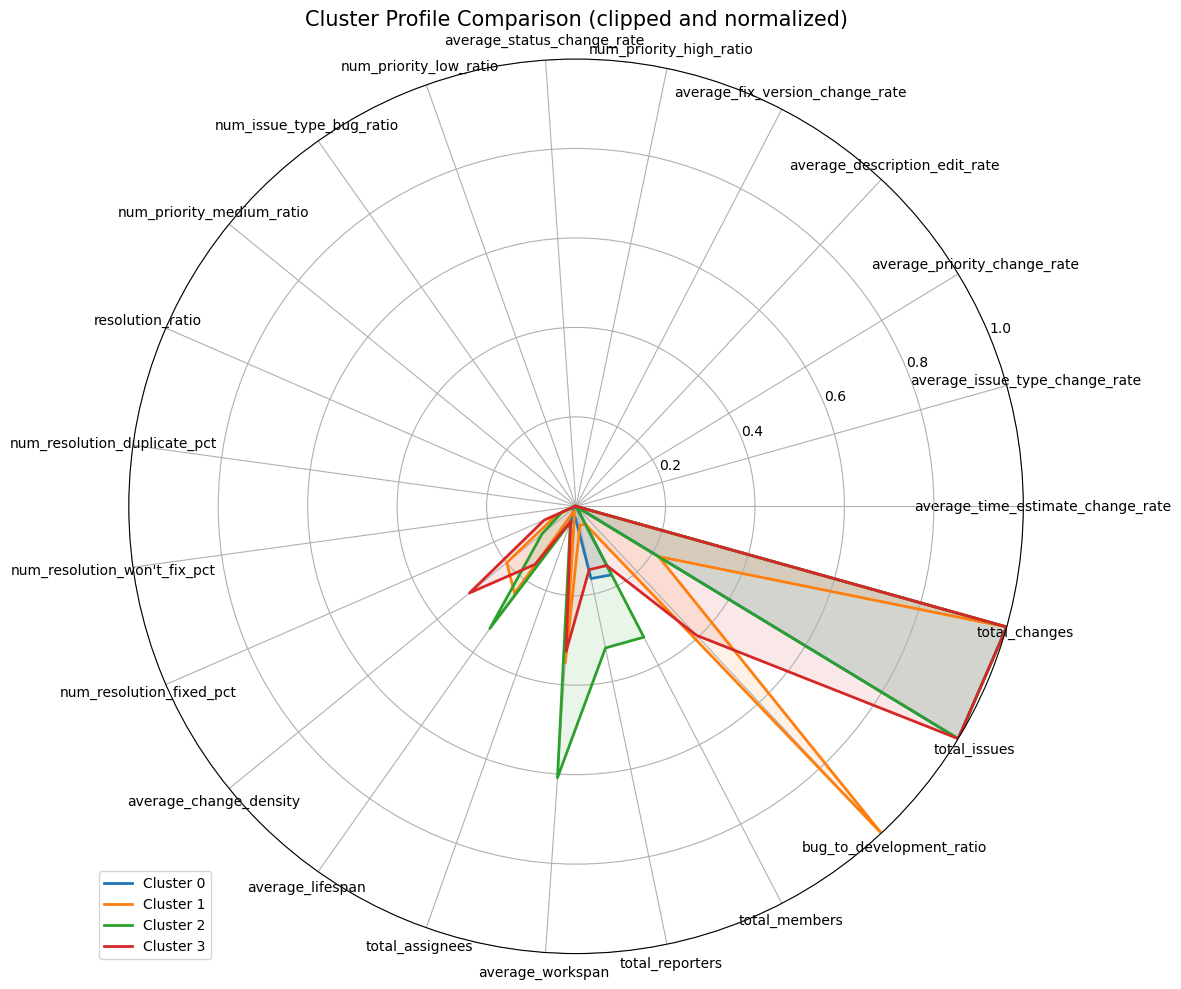

In [13]:
# Analyze Cluster Profiles to Understand Group Differences

# Calculate cluster centers in original feature space
cluster_centers = np.zeros((optimal_k, len(clustering_features)))
for i in range(optimal_k):
    cluster_centers[i] = df_cluster[df.loc[df_cluster.index, 'cluster'] == i].mean()

cluster_profile = pd.DataFrame(
    cluster_centers,
    columns=clustering_features,
    index=[f"Cluster {i}" for i in range(optimal_k)]
)

# Display cluster profiles
print("\nCluster Profiles (Mean Values):")
display(cluster_profile.T)

# Radar chart for visual comparison of cluster profiles
def radar_chart(df, title):
    # Normalize data for radar chart
    df_scaled = df.copy()
    for col in df.columns:
        # Clip by 5th and 95th percentile to reduce outlier effect
        lower = df[col].quantile(0.05)
        upper = df[col].quantile(0.95)
        clipped = df[col].clip(lower, upper)
        df_scaled[col] = (clipped - clipped.min()) / (clipped.max() - clipped.min())
    
    # Plot radar chart
    fig = plt.figure(figsize=(12, 10))
    
    # Create radar plot with multiple traces (one per cluster)
    categories = df.index
    N = len(categories)
    
    # Create angle for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create subplot
    ax = plt.subplot(111, polar=True)
    
    # Set the angle labels
    plt.xticks(angles[:-1], categories, size=10)
    
    # Y-axis goes from 0 to 1
    ax.set_ylim(0, 1)
    
    # Plot each cluster
    for i, cluster in enumerate(df_scaled.columns):
        values = df_scaled[cluster].values.tolist()
        values += values[:1]  # Close the loop
        
        # Plot the cluster
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=cluster)
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, size=15)
    
    return fig

# Sort columns by average cluster center to avoid radar chart spikes
sorted_features = cluster_profile.columns[np.argsort(cluster_profile.mean(axis=0))]

# Remove duplicates while preserving order
sorted_features_unique = []
seen = set()
for f in sorted_features:
    if f not in seen:
        sorted_features_unique.append(f)
        seen.add(f)

# Create radar chart for cluster comparison with sorted features (no duplicates)
radar_chart(cluster_profile[sorted_features_unique].T, "Cluster Profile Comparison (clipped and normalized)")
plt.tight_layout()
plt.show()


Risk Distribution by Cluster:


risk_category,High Risk,Low Risk,Quality Risk Only,Schedule Risk Only
cluster,,,,
0.0,0.000000,0.461538,0.538462,0.000000
1.0,0.187500,0.114583,0.020833,0.677083
2.0,0.075000,0.425000,0.433333,0.066667
3.0,0.022814,0.612167,0.205323,0.159696


<Figure size 1400x800 with 0 Axes>

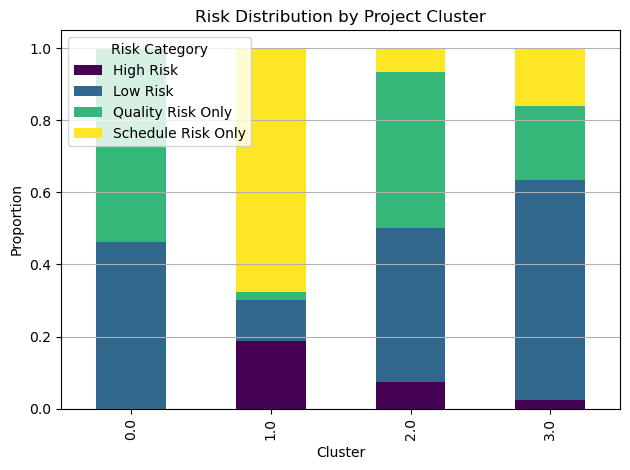

Chi-squared test for independence between cluster and risk category:
Chi2 value: 216.81
p-value: 0.0000
Degrees of freedom: 9
There is a significant association between project clusters and risk categories.


In [14]:
# Analyze Risk Distribution by Cluster
if 'risk_category' in df.columns:
    # Create a crosstab of risk categories by cluster
    risk_by_cluster = pd.crosstab(
        df.loc[df_cluster.index, 'cluster'],
        df.loc[df_cluster.index, 'risk_category'],
        normalize='index'
    )
    
    # Display risk distribution by cluster
    print("\nRisk Distribution by Cluster:")
    display(risk_by_cluster)
    
    # Visualize distribution
    plt.figure(figsize=(14, 8))
    risk_by_cluster.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    plt.title('Risk Distribution by Project Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.legend(title='Risk Category')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
    # Chi-squared test for independence between cluster and risk category
    from scipy.stats import chi2_contingency
    
    # Create contingency table (not normalized)
    contingency = pd.crosstab(df.loc[df_cluster.index, 'cluster'], df.loc[df_cluster.index, 'risk_category'])
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print(f"Chi-squared test for independence between cluster and risk category:")
    print(f"Chi2 value: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    
    if p < 0.05:
        print("There is a significant association between project clusters and risk categories.")
    else:
        print("There is no significant association between project clusters and risk categories.")

In [15]:
# Conclusion of Feature Importance and Project Grouping Analysis

# Create a summary table of top features for each risk type
if 'schedule_risk' in df.columns and 'quality_risk' in df.columns:
    # Top 5 features for each risk type
    top_schedule = list(mi_schedule['feature'])
    top_quality = list(mi_quality['feature'])
    
    # Create summary dataframe
    summary_df = pd.DataFrame({
        'Schedule Risk Predictors': top_schedule,
        'Quality Risk Predictors': top_quality
    })
    
    print("Summary of Top Risk Predictors:")
    display(summary_df)

    # save summary to CSV
    summary_df.to_csv('./apache/top_risk_predictors.csv', index=False)
    
    # Print insights about project clusters
    print("\nProject Group Insights:")
    print(f"- {optimal_k} distinct project profiles identified through clustering")
    print("- Each cluster shows different risk patterns and project characteristics")
    print("- Dimensionality reduction revealed key feature relationships driving project differences")
    
    # Calculate key correlation insights
    high_risk_corr = df['schedule_risk'].corr(df['quality_risk'])
    print(f"\nCorrelation between Schedule and Quality Risk: {high_risk_corr:.2f}")
    
    # Redundancy findings
    if high_corr_pairs:
        print(f"\nRedundancy Analysis: {len(high_corr_pairs)} highly correlated feature pairs identified")
    else:
        print("\nRedundancy Analysis: No highly correlated feature pairs found")

    # VIF analysis
    if not vif_data.empty:
        high_vif = vif_data[vif_data['VIF'] > 5].sort_values('VIF', ascending=False)
        if not high_vif.empty:
            print(f"\nFeature Redundancy: {len(high_vif)} features with high VIF (> 5) indicating potential multicollinearity")
            display(high_vif)
        else:
            print("\nFeature Redundancy: No features with high VIF found")
    else:
        print("\nFeature Redundancy: VIF analysis could not be performed due to missing data")

Summary of Top Risk Predictors:


,Schedule Risk Predictors,Quality Risk Predictors
0,num_resolution_fixed_pct,num_priority_high_ratio
1,total_assignees,num_issue_type_bug_ratio
2,total_changes,bug_to_development_ratio
3,num_resolution_won't_fix_pct,num_priority_medium_ratio
4,average_fix_version_change_rate,num_resolution_won't_fix_pct
5,total_issues,total_assignees
6,total_reporters,num_resolution_duplicate_pct
7,average_issue_type_change_rate,num_resolution_fixed_pct
8,average_workspan,average_workspan
9,average_change_density,average_status_change_rate



Project Group Insights:
- 4 distinct project profiles identified through clustering
- Each cluster shows different risk patterns and project characteristics
- Dimensionality reduction revealed key feature relationships driving project differences

Correlation between Schedule and Quality Risk: -0.11

Redundancy Analysis: 6 highly correlated feature pairs identified

Feature Redundancy: 8 features with high VIF (> 5) indicating potential multicollinearity


,feature,VIF
10,total_issues,11.581195
7,num_resolution_fixed_pct,11.340539
8,num_priority_medium_ratio,7.925043
14,total_changes,6.418603
3,total_reporters,5.745467
0,num_issue_type_bug_ratio,5.421100
9,average_status_change_rate,5.268723
12,total_assignees,5.220486


In [16]:
pd.DataFrame(high_corr_pairs)

,feature1,feature2,correlation
0,total_reporters,total_issues,0.864123
1,total_reporters,total_assignees,0.807930
2,total_reporters,total_changes,0.754912
3,total_issues,total_assignees,0.865963
4,total_issues,total_changes,0.899668
5,total_assignees,total_changes,0.835385


## Interpretation of Dimensionality Reduction Boundaries

The visualizations show different results because each technique has different objectives:

1. **PCA (Principal Component Analysis):**
   - Linear technique that preserves global variance
   - No clear boundaries are expected unless data naturally clusters in high dimensions
   - Log scale is used to better visualize the distribution
   - Density contours help visualize the concentration of points

2. **t-SNE (t-Distributed Stochastic Neighbor Embedding):**
   - Non-linear technique that preserves local structure
   - Multiple perplexity values show different local neighborhood sizes
   - Can create artificial "islands" of points that appear as boundaries
   - Distorted closure is normal and reflects local similarity relationships

3. **UMAP (if available):**
   - Preserves both local and global structure better than t-SNE
   - Often creates more meaningful clusters while maintaining global relationships

The lack of clear boundaries in PCA and the distorted boundaries in t-SNE are not problems - they reflect the underlying structure of the data. These techniques should be used together to get a comprehensive view of the data structure.